# Perceptron and MLP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Activation fonction and derivative

### sigmoid
The sigmoid funtion is given by $\Phi(x)=\frac{1}{1+\exp(-x)}$.

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

she looks like a soft ramp

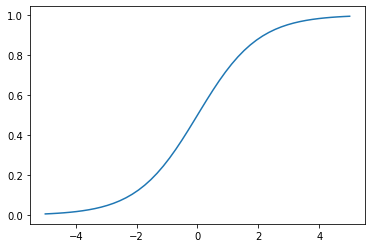

In [4]:
x = np.linspace(-5,5)
f=plt.plot(x,sigmoid(x))

It's derivative is given by
$$
\begin{align}
\Phi'(x) &= \frac{\exp(-x)}{(1+\exp(-x))^2}\\
&=\frac{1}{(1+\exp(-x))}\frac{\exp(-x)}{(1+\exp(-x))}\\
&=\Phi(x)(1-\Phi(x))
\end{align}
$$
### Question 
define the der_sigmoid(x) function which compute the derivative of the sigmoid on a given point x. She will take a numpy vector and return a numpy array.

In [5]:
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

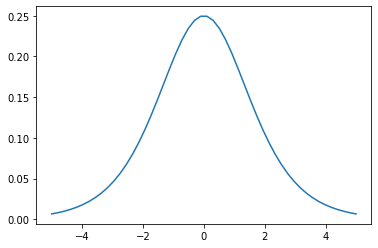

In [6]:
f=plt.plot(x,der_sigmoid(x))

### Fonction tanh
do the same with tanh $tanh(x)$

In [7]:
def tanh(x):
    return np.tanh(x)

In [8]:
def der_tanh(x):
    return 1-np.power(np.tanh(x),2)

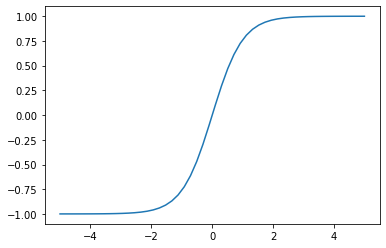

In [9]:
f=plt.plot(x,tanh(x))

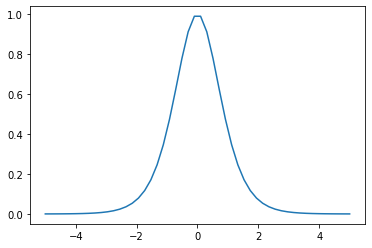

In [10]:
f=plt.plot(x,der_tanh(x))

### Fonction Relu

In [11]:
def relu(x):
    v=np.zeros(x.shape)
    v[x>0]=x[x>0]
    return v

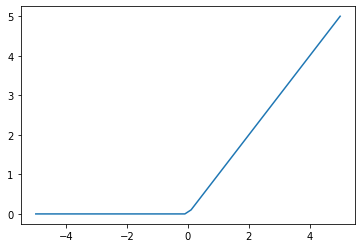

In [12]:
f=plt.plot(x,relu(x))

### Questiocn
Do the same for relu and plot it between $[-5,5]$

In [12]:
def der_relu(x):
    v=np.zeros(x.shape)
    v[x>0]=1
    return v

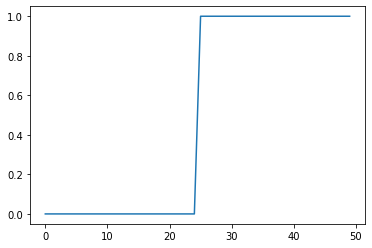

In [13]:
f=plt.plot(der_relu(x))

## Loss function

We will define the cross entropy loss for binary classification. This function take two vectors the predited label $\tilde{y}\in[0,1]$ and the true value $y\in\{0,1\}$ and measure their adequation:
$$L(\tilde{y},y)=-y\log(\tilde(y))-(1-y)\log(1-\tilde{y})$$
To avoid numerical problems we will cap the outputs $\tilde{y}$.

In [13]:
def cross_entropy(yh,y):
    th = 0.000001
    yh[yh<th] = th
    yh[yh>(1-th)] = 1-th
    return -y*np.log(yh)-(1-y)*np.log(1-yh)

### Loss derivative :

In [14]:
def der_cross_entropy(yh,y):
    th= 0.000001
    yh[yh<th] = th
    yh[yh>(1-th)] = 1-th
    return -y/yh+(1-y)/(1-yh)

## Perceptrons
We will simulate some random test data to experiment

In [15]:
X = np.concatenate([np.random.normal([-5,-5],size=[100,2]),
                    np.random.normal([-5,5],size=[100,2]),
                    np.random.normal([5,-5],size=[100,2]),
                    np.random.normal([5,5],size=[100,2])])
y = np.concatenate([np.ones(200),np.zeros(200)])

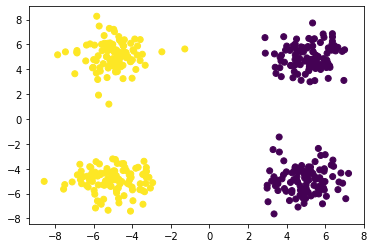

In [16]:
f= plt.scatter(X[:,0],X[:,1],c=y)

The following python class is the squelette of a perceptron 

In [18]:
class Perceptron():
    # inialisation
    def __init__(self,input_size):
        # input size
        self.input_size = input_size
        # weight vector d,1
        self.w = np.random.normal(size=(self.input_size,1))
    
    # compute the output
    def forward(self,X):
        # matrice weight vector product
        z = np.matmul(X,self.w)
        # activation function
        yh = sigmoid(z)
        # reshape
        return yh.reshape((X.shape[0],))
    
    # compute the gradient X size N,d and y of size N 
    def backward(self,X,y):
        # output
        yh = self.forward(X)
        # loss function derivative
        dce  = der_cross_entropy(yh,y)
        # activation function derivative
        dact = der_sigmoid(yh)
        # product of both
        eta = np.reshape(dce*dact,(X.shape[0],1))
        # repeat to sier N,d
        Eta = np.repeat(eta,repeats=self.input_size,axis=1)
        # gradient : average eta*X
        G = np.mean(Eta*X,axis=0)
        # good shape
        return np.reshape(G,(self.input_size,1))
    
    # gradient descent
    # step_size : length of the gradient step
    def grad_desc(self,X,y,step_size):
        # compute the gradient
        grad = self.backward(X,y)
        # update the weight
        self.w = self.w - step_size*grad
    
    # batch gradient
    # epoch : number of step 
    def train_batch(self,X,y,step_size,epoch):
        # save loss evolution
        hist = [self.loss(X,y)]
        # for each epoch
        for r in range(0,epoch):
            # gradeint descent
            self.grad_desc(X,y,step_size)
            # compute the loss
            l=self.loss(X,y)
            # reduce the step size ?
            if(l>hist[-1]):
                step_size=step_size*0.5
            #print("Loss : {}".format(l))
            hist.append(l)
        return np.array(hist)
        
    # sgd 
    # batch_size : size of the batchs
    def train_sgd(self,X,y,step_size,epoch,batch_size):
        # save loss evolution
        hist = [self.loss(X,y)]
        # how many batch per epoch 
        nb_batchs = np.floor(X.shape[0]/batch_size)
        # TODO
        return np.array(hist)
    
    # loss function
    def loss(self,X,y):
        yh = self.forward(X)
        L = cross_entropy(yh,y)
        return np.mean(L)

### Test

In [19]:
# create a peceptron
per = Perceptron(2)
# prediction
yh  = per.forward(X)
# initial loss value
print("Loss : {}".format(per.loss(X,y)))

Loss : 2.554730096882929


If we do one epoch

In [20]:
per.train_batch(X,y,0.0001,1)
print("Loss : {}".format(per.loss(X,y)))

Loss : 2.5443729336483742


And now 500 epochs

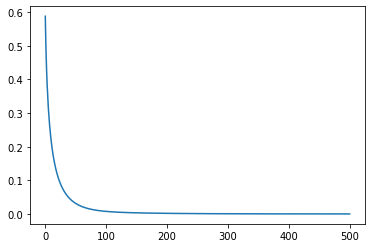

In [21]:
per = Perceptron(2)
h = per.train_batch(X,y,0.01,500)
f=plt.plot(h)

Look a the prediction :

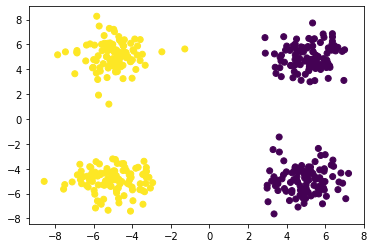

In [22]:
f=plt.scatter(X[:,0],X[:,1],c=per.forward(X)>0.5)

Another dataset

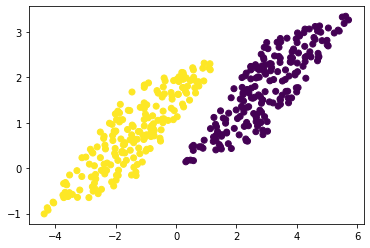

In [23]:
X1=np.concatenate([-1*np.random.rand(200,1)-0.5,np.random.rand(200,1)],axis=1)
X2=np.concatenate([np.random.rand(200,1),np.random.rand(200,1)],axis=1)
X=np.matmul(np.concatenate([X1,X2]),np.reshape([3,0.7,3,2.8],(2,2)))
y=np.concatenate([np.ones(200),np.zeros(200)])
f=plt.scatter(X[:,0],X[:,1],c=y)

### Questions 

- Create a numpy matrix that contains X and an additional column of 1, this will allow for bias to be taken into account in learning. 
- Then create a perceptron of size 3
- Make a batch learning of 200 epochs with a step of 0.05 initially.
- View the results
- Vary the parameters number of epochs and gradient steps

### Questions

- Create a method train_sgd in the class perceptrons. This method takes as input X,y, the gradient step, the number of epochs and the batch size. For each epoch it mixes the dataset (np.random.permutation) and updates the weights after each batch. 
- Test it with the following code.
- Vary the parameters.
- Compare with the batch learning.

We will look now with a more difficult dataset

### Questions
- Créer un perceptrons pour ces données avec biais et sans biais
- Essayez de faire l'apprentissage pas de 0.001, 100 époques et batch de tailles 20
- visualissez les résultats
- Que remarquer vous ?

### Questions
- Create a perceptrons for these data with bias and without bias
- Try to learn in 0.001 steps, 100 epochs and batch sizes 20
- view the results
- What do you notice?


